#  Assignment : Lending Case Study

This Case study is w.r.t the assignment given to us for the EDA module

1. **Harshali Bhoyar**
2. **Rupesh Kumar Shukla**


# Step 1 : Import Relevant Libraries and CSV file

In [21]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
loan = pd.read_csv("loan.csv")
loan_df = loan.copy()
loan_df.head()

C:\Users\21985\AppData\Local\Temp\ipykernel_18496\4034085484.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Step 2 : Data Cleaning

## 2.1 Columns with missing values

In [23]:
na_values_grtr_90 = loan_df.isna().mean()*100
na_values_grtr_90
columns_to_drop = na_values_grtr_90[na_values_grtr_90 > 90.0]
#The below print command will give the columns with missing percentage > 90
print("Columns with missing percentage > 90 : \n", columns_to_drop,"\n")

#The below code gives the columns that needs to be dropped.
print("Columns to drop : \n", columns_to_drop.index,"\n")

#The below code drops the column with missing values > 90
loan_df.drop(columns=columns_to_drop.index, inplace=True)

Columns with missing percentage > 90 : 
 mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl   

### 2.1.1 Columns to drop
1. We identified columns with missing value percentage > 90%.
2. We dropped those columns as they won't give any specific analysis.
3. 55 Columns remain after dropping the columns with Null values with missing percentage > 90%

In [24]:
loan_df.shape
#We have total 39717 Rows and 55 Columns considering all the cases i.e. current, fully paid, charged off

(39717, 55)

In [25]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2.1.2 Filter Loan Status which are Fully Paid or charged off is the data of our interest

In [26]:
#Filter out the data set with loan status not equal to current, which will give us the data of our interese
loan_df = loan_df[loan_df["loan_status"]!='Current']
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### 2.1.3 Analyze the object type categorical columns to identify the unique values.

In [27]:
emp_title = loan_df['emp_title'].unique()
print("Unique Emp titles : ",len(emp_title))

term = loan_df['term'].unique()
print("Unique term : ",len(term))

sub_grade = loan_df['sub_grade'].unique()
print("Unique sub_grade : ",len(sub_grade))

grade = loan_df['grade'].unique()
print("Unique grade : ",len(grade))

emp_length = loan_df['emp_length'].unique()
print("Unique emp_length : ",len(emp_length))

home_ownership = loan_df['home_ownership'].unique()
print("Unique home_ownership : ",len(home_ownership))

earliest_cr_line = loan_df['earliest_cr_line'].unique()
print("Unique earliest_cr_line : ",len(earliest_cr_line))

initial_list_status = loan_df['initial_list_status'].unique()
print("Unique initial_list_status : ",len(initial_list_status))

last_pymnt_d = loan_df['last_pymnt_d'].unique()
print("Unique last_pymnt_d : ",len(last_pymnt_d))

application_type = loan_df['application_type'].unique()
print("Unique application_type : ",len(application_type))

last_credit_pull_d = loan_df['last_credit_pull_d'].unique()
print("Unique last_credit_pull_d : ",len(last_credit_pull_d))

title = loan_df['title'].unique()
print("Unique title : ",len(title))

Unique Emp titles :  28028
Unique term :  2
Unique sub_grade :  35
Unique grade :  7
Unique emp_length :  12
Unique home_ownership :  5
Unique earliest_cr_line :  524
Unique initial_list_status :  1
Unique last_pymnt_d :  102
Unique application_type :  1
Unique last_credit_pull_d :  107
Unique title :  19298


In [55]:
loan_df.nunique().sort_values(ascending=True)

term                          2
loan_status                   2
verification_status           3
pub_rec_bankruptcies          3
home_ownership                5
pub_rec                       5
grade                         7
inq_last_6mths                9
emp_length                   11
delinq_2yrs                  11
purpose                      14
sub_grade                    35
open_acc                     40
addr_state                   50
issue_d                      55
total_acc                    82
mths_since_last_delinq       95
last_pymnt_d                101
last_credit_pull_d          106
int_rate                    370
earliest_cr_line            524
revol_util                 1088
total_rec_late_fee         1320
dti                        2853
recoveries                 4040
annual_inc                 5215
revol_bal                 21275
total_rec_int             34025
last_pymnt_amnt           34418
total_pymnt_inv           36387
dtype: int64

### 2.1.4 Columns with least signifiance
1. id = This is not required as it is just for unique identification
2. member_id =  This is not required as it is just for unique identification
3. url = This is not required as urls are unique
4. desc = This is a text column and cleaning will be a difficult task. Purpose column to be used instead
5. zip_code = The zipcode is incomplete. It doesn't give any significant understanding.
6. initial_list_status = This column just has 1 value 'f'. 
7. emp_title = Lots of unique data. Significant categorical analysis won't happen
8. application_type = This column just has 1 value
9. title = This column can be dropped as it has lots of values, thus cannot be used a categorical data

We can drop the above columns and do further analysis

By looking at the data, the following columns can also be dropped due to limited values:
1. tax_liens = Only 0 and NA 
2. delinq_amnt = Only 0 and NA
3. chargeoff_within_12_mths = Only 0 and NA
4. acc_now_delinq = 0 only
5. policy_code = 1 Only 
6. collections_12_mths_ex_med = Only 0 and NA
7. out_prncp = 0 Only
8. out_prncp_inv = 0 only


In [28]:
least_signi_col = ['id','member_id','url','desc','zip_code','initial_list_status','emp_title','application_type','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv','title']
loan_df.drop(least_signi_col, axis=1, inplace=True)
loan_df.shape

(38577, 38)

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  pymnt_plan            

### 2.1.5 Identify columns that are highly co-related.
1. We have chosen columns like loan_amnt, funded_amnt etc., as these columns represent a similar aspect
2. If 1 or more columns are highly co-related then, we can take only 1 column into consideration 

C:\Users\21985\AppData\Local\Temp\ipykernel_18496\416780345.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df[correlated_columns].corr()


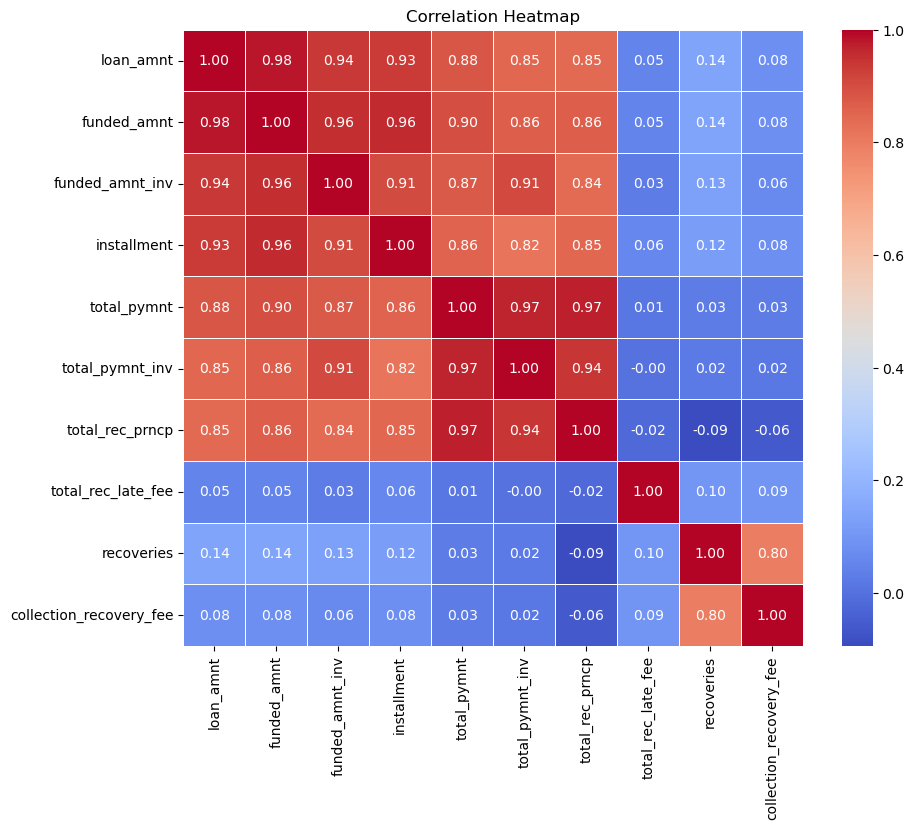

In [29]:
correlated_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pymnt_plan','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
correlation_matrix = loan_df[correlated_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### From the heatmap we can see that the above columns are highly co-related. Thus, we can consider any one of the column and the same result can be applied on other parameters also

We can drop all the correalted columns. I am keeping 'total_pymnt_inv' and 'recoveries' columns.
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. installment pymnt_plan
5. total_pymnt
6. total_rec_prncp
7. collection_recovery_fee

In [30]:
correlated_columns_to_drop = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pymnt_plan', 'total_pymnt', 'total_rec_prncp','collection_recovery_fee']
loan_df.drop(columns=correlated_columns_to_drop, inplace=True)

In [12]:
loan_df.shape

(38577, 30)

### We have dropped total of 81 Columns and only 30 columns of interest remain as of now. We'll do further analysis on the columns which needs to be cleaned.

## 2.2 Column cleaning and data formatting

#### After dropping the least significant columns, we can do the cleaning of the data where special characters like "%" are present. This will help the columns to be treated as a quantifiable data. Also, we can convert all the date columns into the date data type.

In [31]:
#loan_df_dcol is the data set that is created after dropping all the relevant data 

loan_df_dcol = loan_df.copy()
loan_df_dcol['revol_util'] = loan_df_dcol['revol_util'].str.rstrip('%').astype(float)
loan_df_dcol['int_rate'] = loan_df_dcol['int_rate'].str.rstrip('%').astype(float)
loan_df_dcol['term'] = loan_df_dcol['term'].str.rstrip('months').astype(int)
loan_df_dcol['issue_d'] = pd.to_datetime(loan_df_dcol['issue_d'], format='%b-%y')
loan_df_dcol['last_pymnt_d'] = pd.to_datetime(loan_df_dcol['last_pymnt_d'], format='%b-%y')
loan_df_dcol['last_credit_pull_d'] = pd.to_datetime(loan_df_dcol['last_credit_pull_d'], format='%b-%y')
loan_df_dcol['earliest_cr_line'] = pd.to_datetime(loan_df_dcol['earliest_cr_line'], format='%b-%y')
loan_df_dcol.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,...,83.7,9,5833.84,863.16,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,...,9.4,4,1008.71,435.17,0.00,117.08,2013-04-01,119.66,2013-09-01,0.0
2,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,...,98.5,10,3005.67,605.67,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,...,21.0,37,12231.89,2214.92,16.97,0.00,2015-01-01,357.48,2016-04-01,0.0
5,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,...,28.3,12,5632.21,632.21,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


### 2.2.1 Column Cleaning 
1. revol_util = % sign removed and converted to float
2. int_rate = % sign removed and converted to float
3. term = months removed and converted to int
4. issue_d, last_pymnt_d, last_credit_pull_d, earliest_cr_line has been converted into date format

## Step 3 : Data Analysis and Visualization

### 3.1 Bivariate Analysis 

#### 3.1.1 Create Bins for the "revol_util"
##### Utilization Bins
1. 0%-20%
2. 20%-40%
3. 40%-60%
4. 60%-80%
5. 80%-100%

In [62]:
def createRevolUtilBin(x):
    if x>80:
        return "80%-100%"
    elif 60<x and x<=80:
        return "60%-80%"
    elif 40<x and x<=60:
        return "40%-60%"
    elif 20<x and x<=40:
        return "20%-40%"
    elif x<=20:
        return "0%-20%"
    else:
        return "Error"
    
loan_df_clnd = loan_df_dcol.copy()
#Let's make a copy of the cleaned dataframe and name it as loan_df_clnd
loan_df_clnd = loan_df_clnd.dropna(subset=['revol_util'])
loan_df_clnd.loc[:, 'util_range'] = loan_df_clnd['revol_util'].apply(createRevolUtilBin)


In [65]:
#For getting the analysis, We need to create a percentage wise graph. 
#For that I have created a function which creates a pivot table w.r.t loan stat

def plot_wrt_percentage(dataframe,x1,y1):
    piv_ls_util_range = dataframe.groupby([x1, y1]).size().unstack(fill_value=0).reset_index()
    piv_ls_util_range['Total'] = piv_ls_util_range['Charged Off'] + piv_ls_util_range['Fully Paid']
    piv_ls_util_range['Defaulter_%'] = round(piv_ls_util_range['Charged Off']*100/piv_ls_util_range['Total'])
    piv_ls_util_range['Fully_Paid_%'] = round(piv_ls_util_range['Fully Paid']*100/piv_ls_util_range['Total'])
    piv_ls_util_range_sorted = piv_ls_util_range.sort_values(by='Defaulter_%')
    
    
    print("Following is the table for : ",x1,"w.r.t",y1, "\n\n\n", piv_ls_util_range_sorted)
    
    ax = piv_ls_util_range_sorted.plot.bar(x=x1, y='Defaulter_%')
    ax.bar_label(ax.containers[0], fmt='%.f%%', label_type='edge', fontsize=8)

    plt.xlabel(x1)
    plt.ylabel('Default/Charged Off Percentage')
    chart_title = 'Default/Charged Off Percentage w.r.t ' + x1
    plt.title(chart_title)
    
    ax = piv_ls_util_range_sorted.plot.bar(x=x1, y='Fully_Paid_%', color='limegreen')
    ax.bar_label(ax.containers[0], fmt='%.f%%', label_type='edge', fontsize=8)
    
    plt.xlabel(x1)
    plt.ylabel('Fully Paid Percentage')
    chart_title = 'Fully Paid Percentage w.r.t ' + x1
    plt.title(chart_title)
    


Following is the table for :  Interest Bin w.r.t loan_status 


 loan_status Interest Bin  Charged Off  Fully Paid  Total  Defaulter_%  \
0                   5-10          830       11486  12316          7.0   
1                  10-15         2702       15543  18245         15.0   
2                  15-20         1785        5414   7199         25.0   
3                  20-25          294         473    767         38.0   

loan_status  Fully_Paid_%  
0                    93.0  
1                    85.0  
2                    75.0  
3                    62.0  


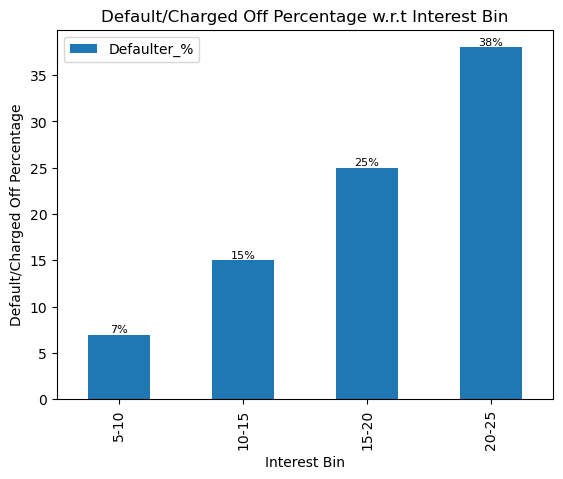

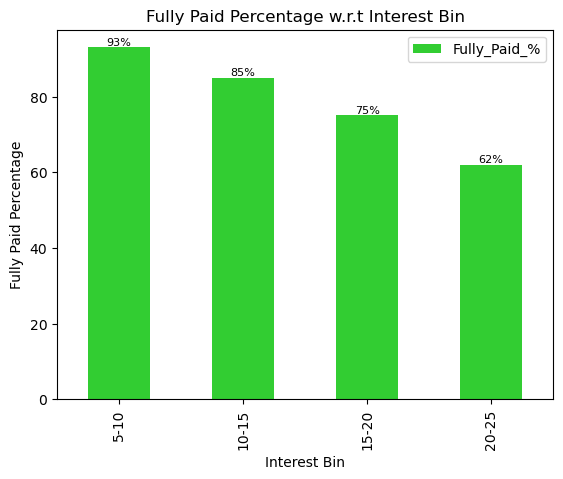

In [66]:
bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']
loan_df_clnd['Interest Bin'] = pd.cut(loan_df_clnd['int_rate'],bins=bins,labels=labels)
plot_wrt_percentage(loan_df_clnd,'Interest Bin','loan_status')

Following is the table for :  util_range w.r.t loan_status 


 loan_status util_range  Charged Off  Fully Paid  Total  Defaulter_%  \
0               0%-20%          770        6990   7760         10.0   
1              20%-40%          915        6790   7705         12.0   
2              40%-60%         1236        7172   8408         15.0   
3              60%-80%         1356        6658   8014         17.0   
4             80%-100%         1334        5306   6640         20.0   

loan_status  Fully_Paid_%  
0                    90.0  
1                    88.0  
2                    85.0  
3                    83.0  
4                    80.0  


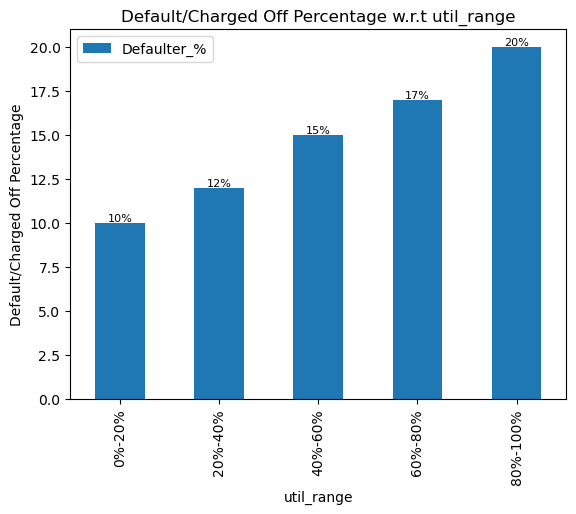

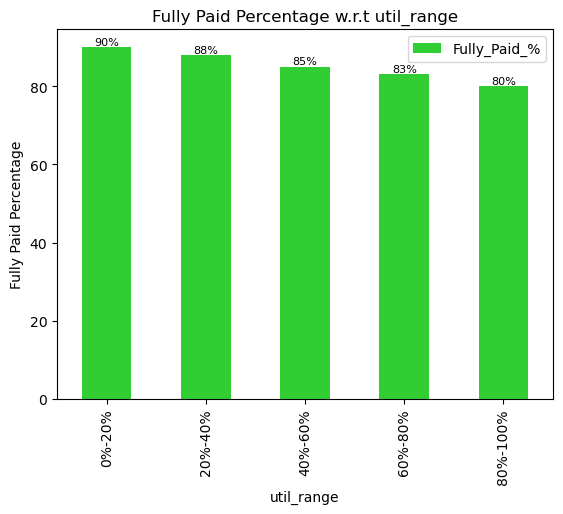

In [67]:
plot_wrt_percentage(loan_df_clnd,'util_range','loan_status')

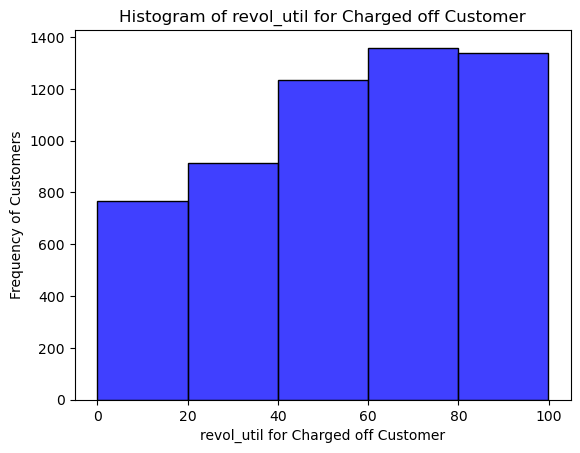

In [41]:
Charged_Off_df = loan_df_clnd[loan_df_clnd['loan_status']=='Charged Off']
Charged_Off_df['revol_util'].info

sns.histplot(Charged_Off_df['revol_util'], bins=5 , color='blue')
plt.title('Histogram of revol_util for Charged off Customer')
plt.xlabel('revol_util for Charged off Customer')
plt.ylabel('Frequency of Customers')

plt.show()

Following is the table for :  home_ownership w.r.t loan_status 


 loan_status home_ownership  Charged Off  Fully Paid  Total  Defaulter_%  \
1                     NONE            0           3      3          0.0   
0                 MORTGAGE         2323       14687  17010         14.0   
3                      OWN          441        2529   2970         15.0   
4                     RENT         2829       15619  18448         15.0   
2                    OTHER           18          78     96         19.0   

loan_status  Fully_Paid_%  
1                   100.0  
0                    86.0  
3                    85.0  
4                    85.0  
2                    81.0  


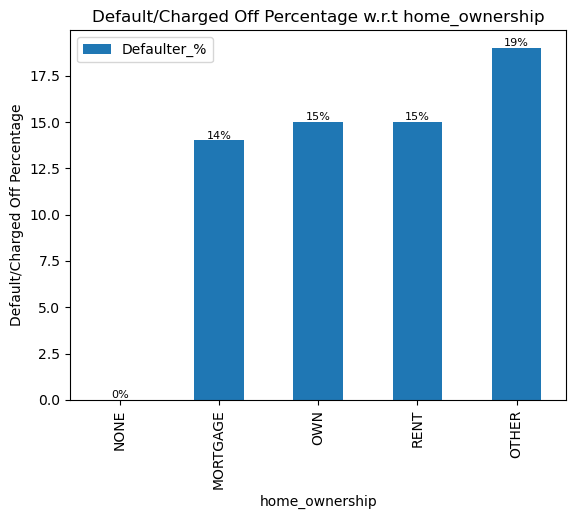

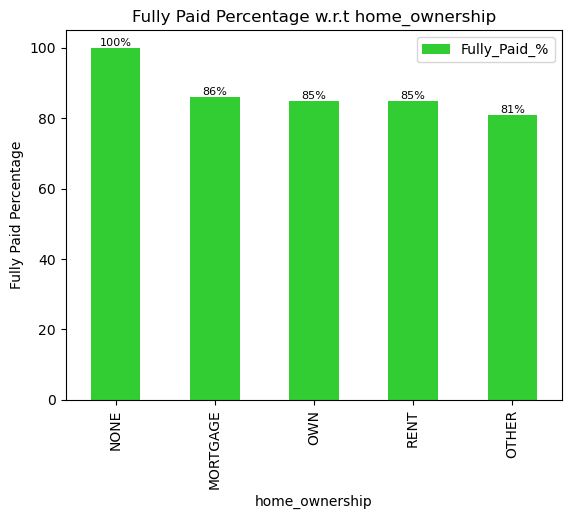

In [42]:
plot_wrt_percentage(loan_df_clnd,'home_ownership','loan_status')

Following is the table for :  purpose w.r.t loan_status 


 loan_status             purpose  Charged Off  Fully Paid  Total  Defaulter_%  \
6                major_purchase          221        1923   2144         10.0   
13                      wedding           96         829    925         10.0   
0                           car          159        1338   1497         11.0   
1                   credit_card          541        4484   5025         11.0   
4              home_improvement          344        2526   2870         12.0   
12                     vacation           53         321    374         14.0   
2            debt_consolidation         2762       15281  18043         15.0   
7                       medical          105         574    679         15.0   
5                         house           59         308    367         16.0   
8                        moving           92         482    574         16.0   
9                         other          629        3223   3

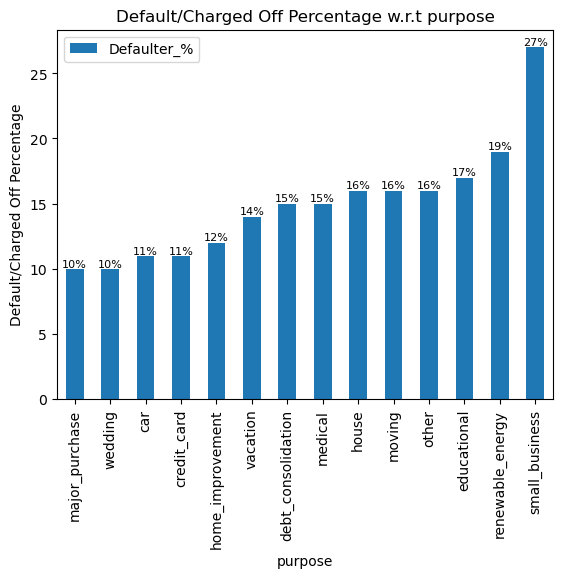

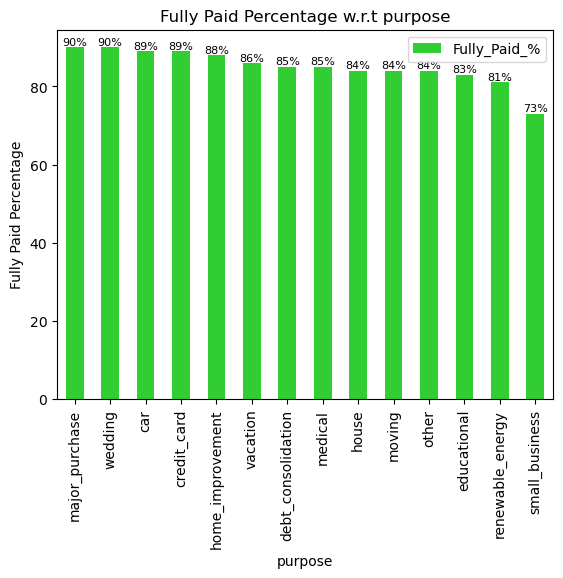

In [43]:
plot_wrt_percentage(loan_df_clnd,'purpose','loan_status')

Following is the table for :  grade w.r.t loan_status 


 loan_status grade  Charged Off  Fully Paid  Total  Defaulter_%  Fully_Paid_%
0               A          602        9443  10045          6.0          94.0
1               B         1425       10249  11674         12.0          88.0
2               C         1343        6477   7820         17.0          83.0
3               D         1115        3954   5069         22.0          78.0
4               E          711        1941   2652         27.0          73.0
5               F          316         654    970         33.0          67.0
6               G           99         198    297         33.0          67.0


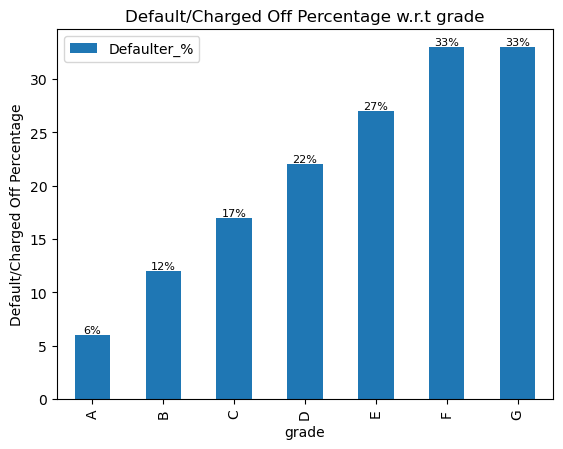

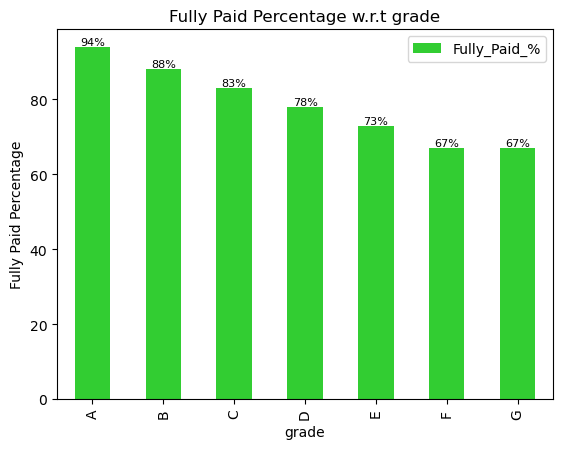

In [44]:
plot_wrt_percentage(loan_df_clnd,'grade','loan_status')

Following is the table for :  term w.r.t loan_status 


 loan_status  term  Charged Off  Fully Paid  Total  Defaulter_%  Fully_Paid_%
0              36         3214       25835  29049         11.0          89.0
1              60         2397        7081   9478         25.0          75.0


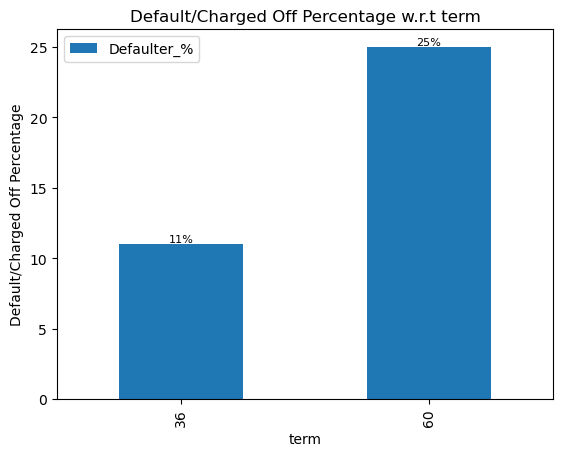

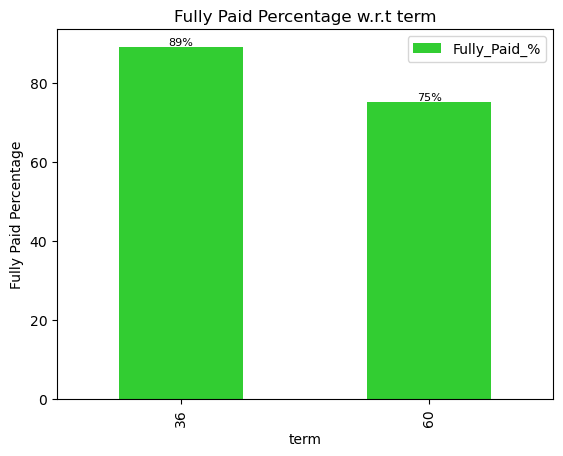

In [45]:
plot_wrt_percentage(loan_df_clnd,'term','loan_status')

In [ ]:
plot_wrt_percentage(loan_df_clnd,'emp_length','loan_status')

Following is the table for :  addr_state w.r.t loan_status 


 loan_status addr_state  Charged Off  Fully Paid  Total  Defaulter_%  \
21                  ME            0           3      3          0.0   
15                  IN            0           9      9          0.0   
12                  IA            0           5      5          0.0   
49                  WY            4          76     80          5.0   
7                   DC           15         194    209          7.0   
8                   DE           11         101    112         10.0   
25                  MS            2          17     19         11.0   
45                  VT            6          47     53         11.0   
37                  PA          179        1285   1464         12.0   
48                  WV           21         151    172         12.0   
42                  TX          314        2341   2655         12.0   
19                  MA          159        1137   1296         12.0   
18            

<Figure size 2000x600 with 0 Axes>

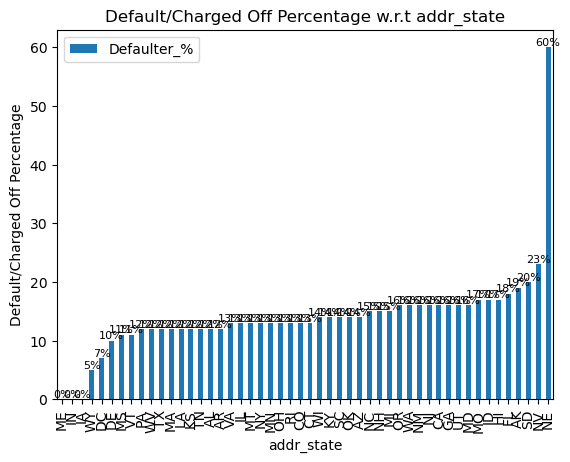

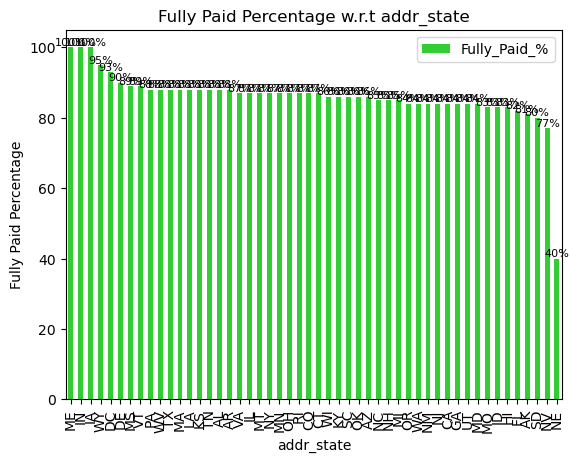

In [56]:
plt.figure(figsize=(20, 6))
plot_wrt_percentage(loan_df_clnd,'addr_state','loan_status')

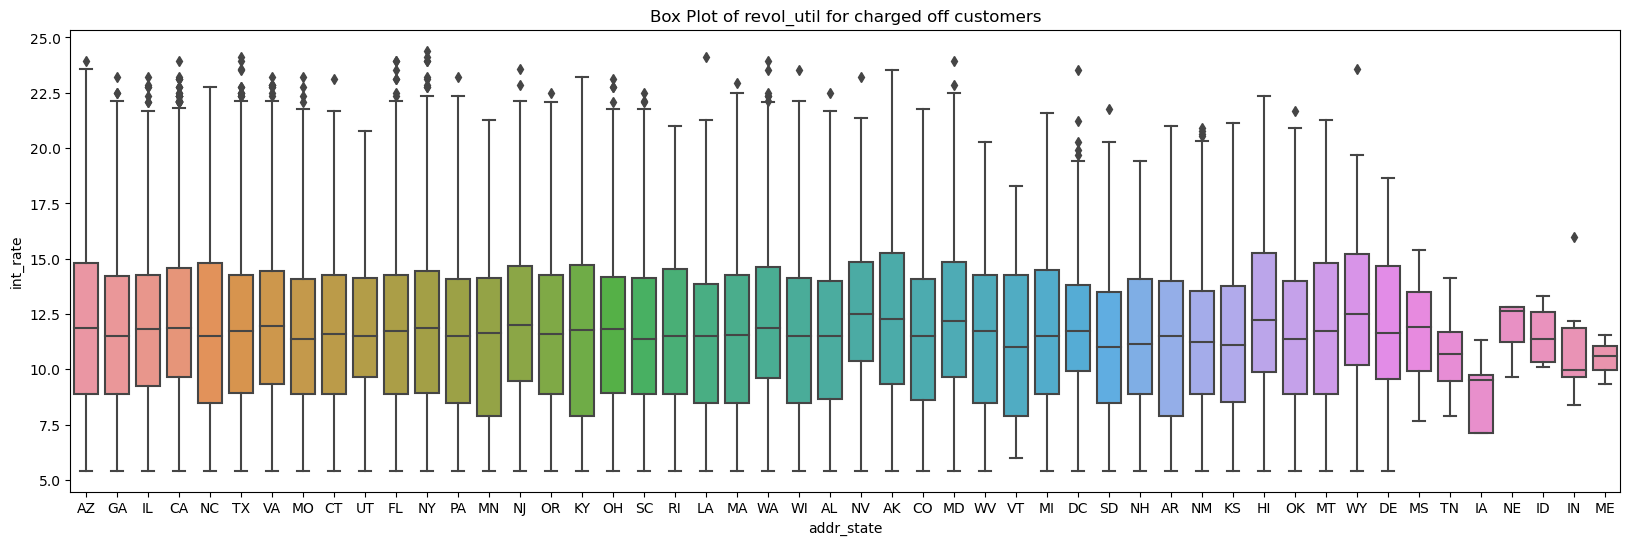

In [47]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='addr_state', y='int_rate', data=loan_df_clnd)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

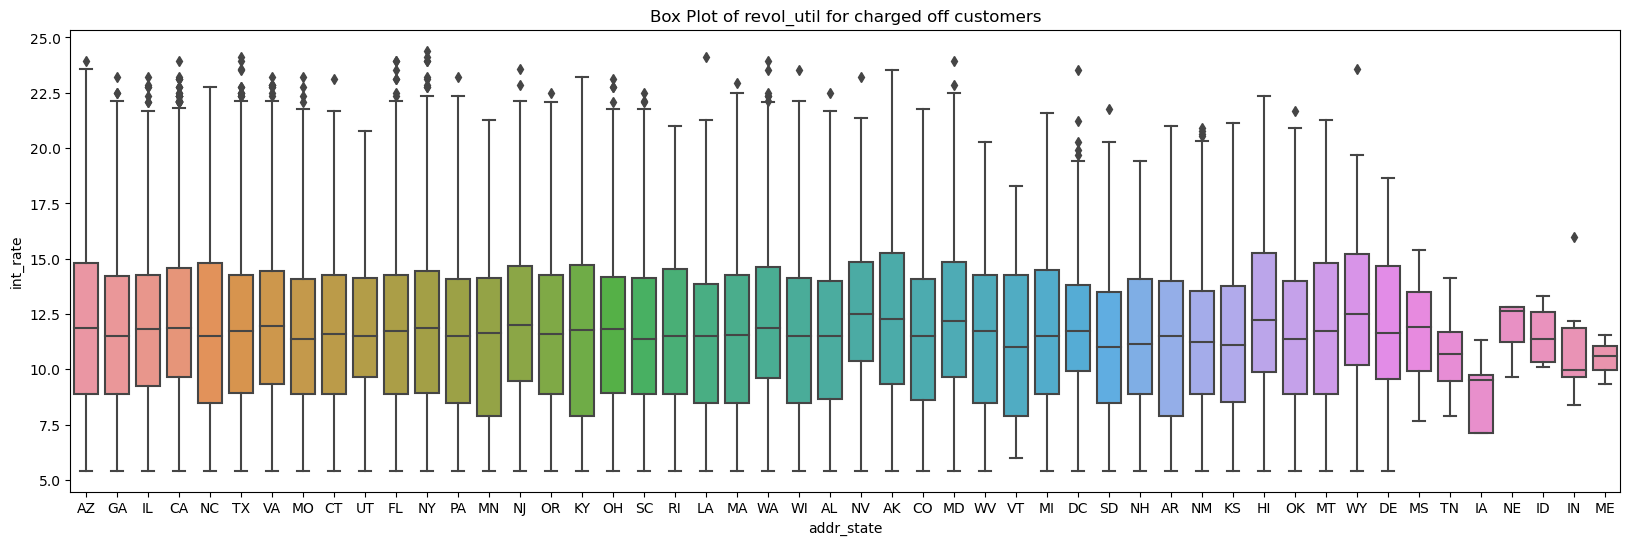

In [68]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='addr_state', y='int_rate', data=loan_df_clnd)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

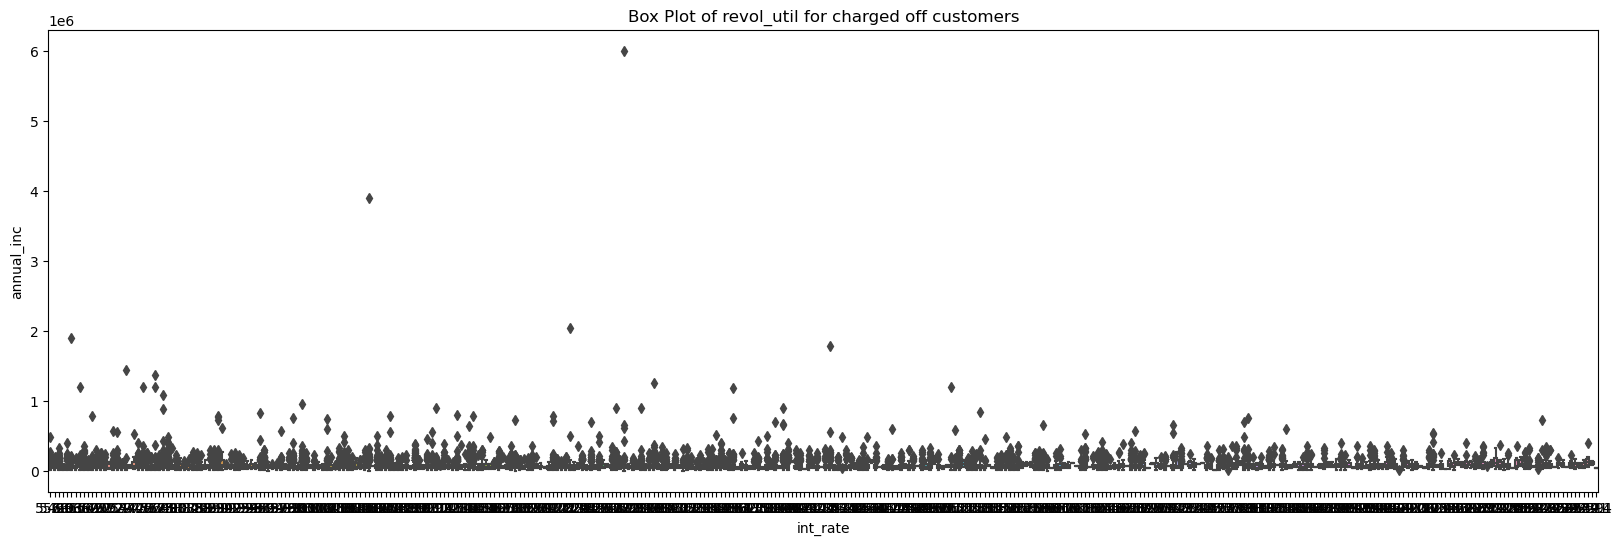

In [69]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='int_rate', y='annual_inc', data=loan_df_clnd)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

### From the above line chart and histogram  we can infer the following:
1. Increased likely-hood with Increasing utilization
2. People with high credit utilization are more likely to be defaulters when compared to people with lesser utilization.
3. People with utilization <30% can be our ideal customers
4. Frequency distrubtuion is highest for the people with highest utilization.
5. From the box plot we can see that the median is close to 60%.

### From the above line chart and histogram  we can infer the following:
1. Customer with Small_business are likely to be charged off compared to other businesses


loan_amnt: The loan amount requested.
int_rate: The interest rate on the loan.
annual_inc: The borrower's annual income.
dti: Debt-to-Income ratio.
delinq_2yrs: Number of delinquencies in the borrower's credit file.
revol_util: Revolving line utilization rate.
open_acc: Number of open credit lines.
pub_rec: Number of derogatory public records.